### **ML Bank Default Project**

**Business Objective**-Build a Machine learning model to predict the Customer is defaulter or non defaulter 

**Importing pandas library**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn import metrics, tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

 **Data Loading and Reading**

In [3]:
# Loading data into Data source 
from google.colab import files
uploaded = files.upload()

Saving bankloans.csv to bankloans.csv


In [6]:
import io
loan = pd.read_csv(io.BytesIO(uploaded['bankloans.csv']))
loan.sample(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
92,38,1,5,5,54.0,10.6,1.499688,4.224312,0.0
716,26,4,1,5,92.0,13.0,6.506240,5.453760,NaN
811,38,1,21,17,65.0,16.8,2.533440,8.386560,NaN
673,35,1,0,5,34.0,11.1,1.369962,2.404038,1.0
632,47,1,31,9,136.0,23.1,14.231448,17.184552,1.0
414,29,2,1,7,29.0,21.2,2.330092,3.817908,1.0
44,26,1,0,0,14.0,7.5,0.302400,0.747600,1.0
295,45,1,10,14,52.0,5.4,0.932256,1.875744,0.0
486,27,4,2,8,23.0,5.7,0.319884,0.991116,1.0
427,43,1,16,7,89.0,0.4,0.159488,0.196512,0.0


#### **Understanding the Dataset**

In [7]:
rows, columns = loan.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 850
Columns: 9


**Observations** :So, we see that the data is 850 rows, that is 850 data points and 9 columns, that is 9 features. Out of 9 features, 8 are input features and 1 is output feature

####**Check the data types and other information.**

In [10]:
loan.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,846.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.492908,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.369605,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.000000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    846 non-null    float64
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 59.9 KB


**Observations:**  

*   We see data data has all numerical columns
*   Income and default columns have null values too 



###**Exploratory Data Analysis**

**Let us check if there are any missing values in the data.**



In [11]:
loan.isnull().sum()

age           0
ed            0
employ        0
address       0
income        4
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

**Observation:**
Income and default have nan values,we need to correct them

**Dropping nan values from income column**

In [18]:
loan = loan.dropna(axis=0, subset=['income'])


**Observation**
```
We see that default column has 150 nan values which is hard to drop 
We can keep that null value data for future prediction and work on rest of non null data```



**Seperating future data from main data**

In [23]:
future_data = loan[~loan.index.isin(loan.dropna().index)]

In [25]:
loan_data=loan[loan.index.isin(loan.dropna().index)]

**Let us check the data column names.**

In [26]:
loan_data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

**Check the data distribution.**

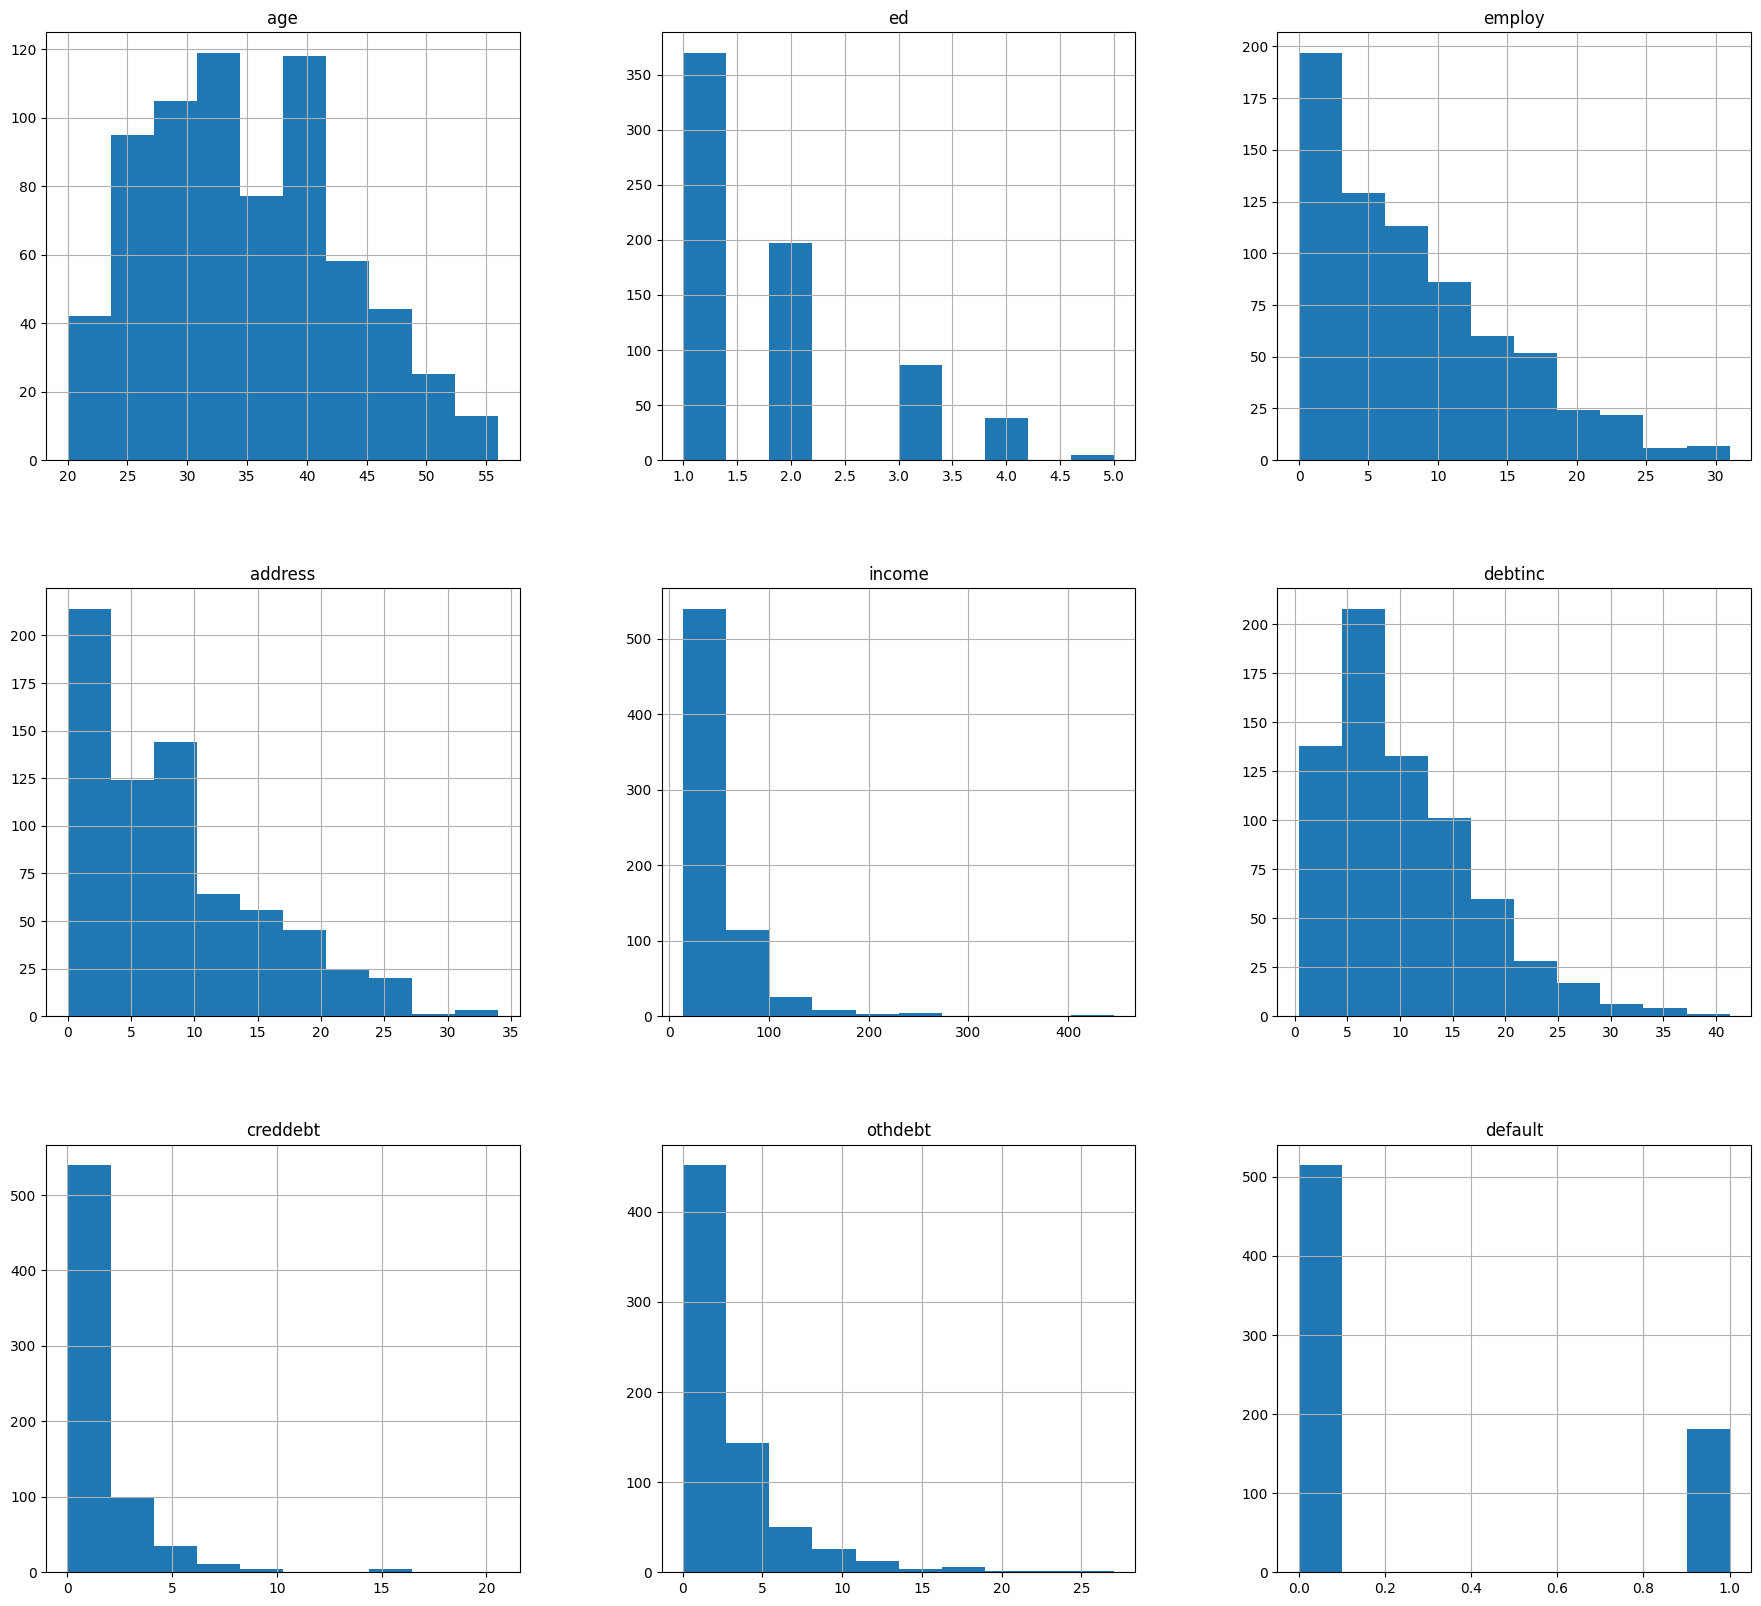

In [27]:
loan_data.hist( figsize = (22, 20) )
plt.show()

**Observation**

*   We can see all our data columns are right skewed and  also have some outliers present
*  Customers are in the Age Category of 25-40
*   Maximum customers are of education level 1-2 or less educated
*   Stable employed customers are in minority while the newlyhired ones are in majority

*   Out of 696 Only around 200 customers are living on same address from 10 +years
*   Maximum customers income is in Range of 10-100k

*   Count of the target variable we see majority(500+) are non 
defaulters while defaulters are in minority(150+)











###**Does education level have any impact on default?**

<Axes: xlabel='ed'>

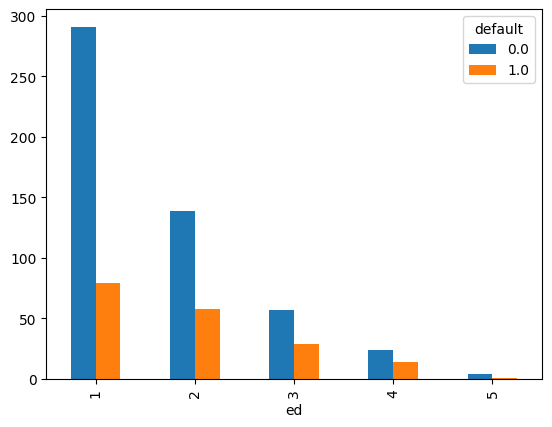

In [36]:
pd.crosstab(loan_data['ed'],loan_data['default']).plot(kind='bar')  

**Observation**-


*   In Each level of education holders count of non defaulters is less than defaluters
*   Level 1 and 2 education customers are in majority



###**Does Income have any impact on default?**

<Axes: xlabel='default', ylabel='income'>

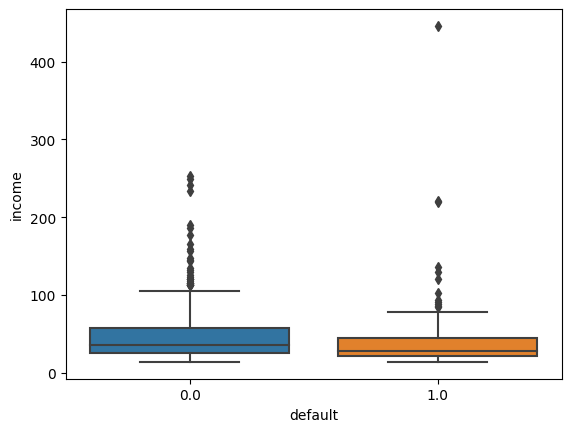

In [53]:
sns.boxplot(x ="default",y="income" ,data = loan_data)

**Observations**-Income column have major outliers specially in  defaulters one

####**Plotting the Correlation plot**

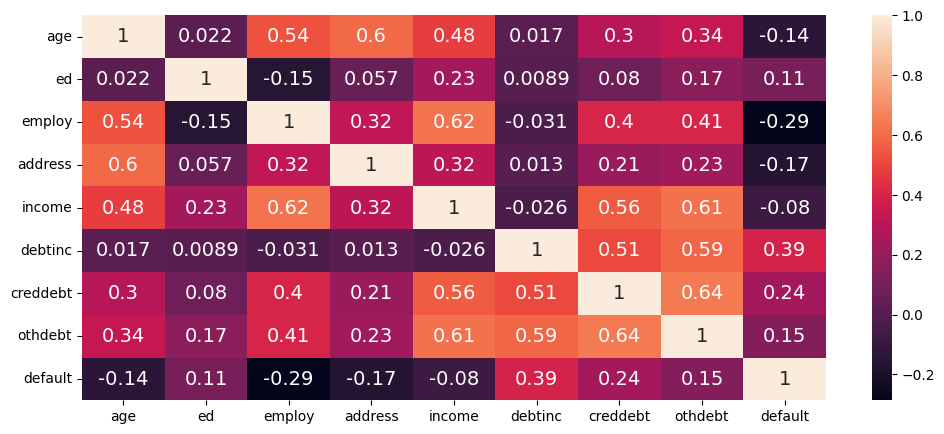

In [124]:
fig, ax = plt.subplots( figsize = (12,5) )
corr_matrix = loan_data.corr()
corr_heatmap = sns.heatmap( corr_matrix, annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

**Observation**-
*   We see that debtinc,employ and creddeb have maximum correlation with default
*   While Age,ed,address,otherdebt and income have the least correlation




###**Data Scalling to bring our data in same range**

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
loan_scaling=pd.DataFrame(scaler.fit_transform(loan_data),columns=loan_data.columns)
loan_scaling

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,-0.978600,-0.778710,0.248406,-0.332240,-0.393258,1.028450,-0.085893,0.287843,-0.592838
1,0.645161,-0.778710,1.000759,0.839332,0.263377,-0.697147,-0.328261,-0.268382,-0.592838
2,0.770066,-0.778710,1.000759,0.839332,2.041764,-1.077363,0.534969,-0.677578,-0.592838
3,-1.353314,0.298789,-0.955358,-1.210918,-0.475337,1.028450,0.117738,0.001138,1.686803
4,0.770066,0.298789,-0.503947,-0.478686,-0.557417,-0.009833,-0.550157,-0.271912,-0.592838
...,...,...,...,...,...,...,...,...,...
691,0.145543,0.298789,-0.353476,0.985778,-0.502697,-0.828760,-0.612716,-0.629404,1.686803
692,-0.728790,0.298789,-0.353476,-0.625133,-0.666856,0.180275,-0.561269,-0.305857,-0.592838
693,-0.229171,-0.778710,1.000759,-0.771579,-0.365898,-0.390049,-0.502958,-0.337669,-0.592838
694,1.269685,-0.778710,1.602641,2.010903,0.865293,-0.273060,0.364438,0.337820,-0.592838


###**Splitting the Data into Test and Train**

```
We are splitting our data in ratio of 70:30 raio with random state 20 
So that we can use 70% data to train our model and do testing on 30 % of our data

X is our dependent data 
Y is our independent data which is default column having 1 as Default and 0 as Non default```



In [130]:
X=loan_scaling.drop('default',axis=1)
y=loan_data['default']

**Training and Testing Splitting**

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)  

In [132]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (487, 8)
y_train (487,)
X_test (209, 8)
y_test (209,)


###**Using Different Classifier Models to choose for the best one**


####**1.Logistic Regression**
Training the modal

In [133]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

**Model prediction**

In [134]:
y_pred=logreg.predict(X_test) 

**Defining confusion matrix function for all models**


In [136]:

def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=X_test):
   
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Default-0","Default-1"], 
                         columns=["Default-0","Default-1"])

    group_counts = [f"{value:0.0f}" for value in cm.flatten()]   
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]  
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (5, 3))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=8);

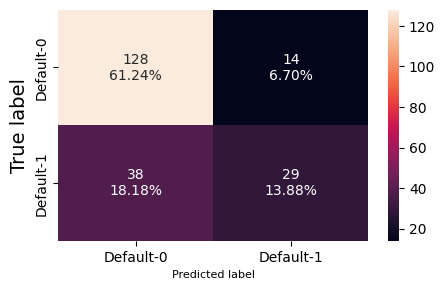

In [137]:
make_confusion_matrix(logreg, y_test)

**Observations:**



*   128 Customers are non defaulters which is actually true and model also predicting correctly
*   29 Customers are Defaulters which is actually true and model also predicting correctly



In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

**Checking Accuracy, Precision, F1-Score,Recall**

In [77]:
print("Accuracy Score  : ", accuracy_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score: ",round(f1_score(y_test,y_pred,average='weighted'),2))
print("Precision Score : ",round(precision_score(y_test,y_pred,average='weighted'),2))

Accuracy Score  :  0.7511961722488039
Recall :  0.7511961722488039
F1 Score:  0.73
Precision Score :  0.74


**Classification Report**

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       142
         1.0       0.67      0.43      0.53        67

    accuracy                           0.75       209
   macro avg       0.72      0.67      0.68       209
weighted avg       0.74      0.75      0.73       209



**Observation**-
*   Log regression model is predicting Accuracy of 75%
*  Out of 209 , 142 predictions are Non defaluters and 67 defaulters




**ROC CURVE**

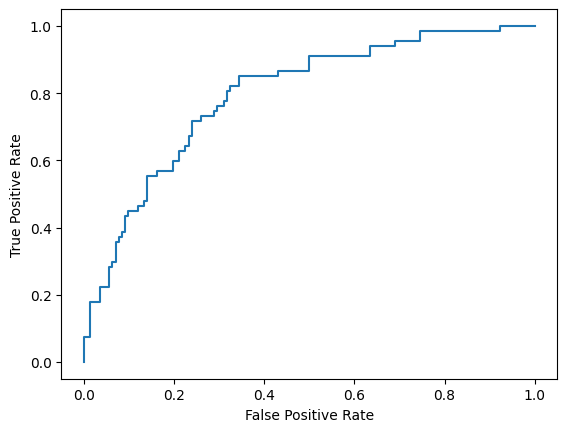

In [122]:
from sklearn import datasets, metrics, model_selection, svm
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Observation**

*  Log regression provides Accuarcy of 75% 
*  Where -Right pred(True positives and false negatives)were 61.2 and 13.8% 
*  Wrong pred(True negative and false positive) were 18.1 and 6.7%




####**2.NAIVE BEYES**
Building the model

In [78]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

**Value prediction**

In [79]:
y_pred2 = nb_model.predict(X_test) 

**Model Evaluation**

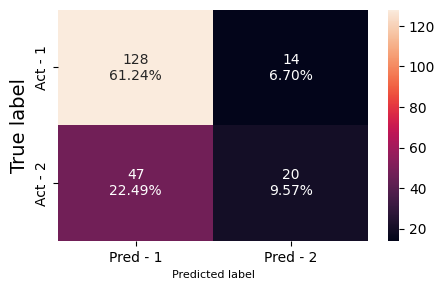

In [80]:
# Confusion matrix
make_confusion_matrix(nb_model, y_test)

**Observations**:

*   128 Customers are non defaulters which is actually true and model also predicting correctly
*   20 Customers are Defaulters which is actually true and model also 
predicting correctly

**Checking Accuracy, Precision, F1-Score,Recall**

In [81]:
print("Accuracy Score  : ", round(accuracy_score(y_test,y_pred2),2))
print("Recall : ",round(recall_score(y_test,y_pred2,average='weighted'),2))
print("F1 Score: ",round(f1_score(y_test,y_pred2,average='weighted'),2))
print("Precision Score : ",round(precision_score(y_test,y_pred2,average='weighted'),2))

Accuracy Score  :  0.71
Recall :  0.71
F1 Score:  0.68
Precision Score :  0.69


**Classification Report**

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.73      0.90      0.81       142
         1.0       0.59      0.30      0.40        67

    accuracy                           0.71       209
   macro avg       0.66      0.60      0.60       209
weighted avg       0.69      0.71      0.68       209



**Observation**- 

*   Naive Beyes model is predicting Accuracy of 71%

*   Out of 209 , 142 predictions are Non defaluters and 67 defaulters




**ROC CURVE**

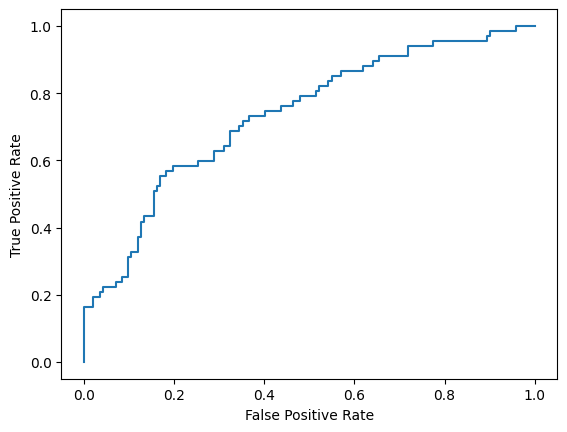

In [138]:
from sklearn import datasets, metrics, model_selection, svm
y_pred_proba = nb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Observation**

*  Naive Beyes provides Accuarcy of 71% 
*  Where -Right pred(True positives and false negatives)were 61.2 and 9.5% 
*  Wrong pred(True negative and false positive) were 22.4 and 6.7%




#### **3.DECISION TREE**
Building the model

In [141]:
 dt_model = DecisionTreeClassifier()

# feeding the training data to the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

**Model Prediction**

In [142]:
y_pred3 = dt_model.predict(X_test)

**Model evaluation**

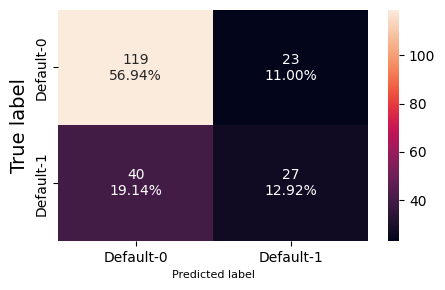

In [143]:
# Confusion matrix
make_confusion_matrix(dt_model, y_test)

**Observations**:


*   121 Customers are non defaulters which is actually true and model also predicting correctly
*   28 Customers are Defaulters which is actually true and model also 
predicting correctly

**Checking Accuracy, Precision, F1-Score,Recall**

In [86]:
print("Accuracy Score  : ", round(accuracy_score(y_test,y_pred3),2))
print("Recall : ",round(recall_score(y_test,y_pred3,average='weighted'),2))
print("F1 Score: ",round(f1_score(y_test,y_pred3,average='weighted'),2))
print("Precision Score : ",round(precision_score(y_test,y_pred3,average='weighted'),2))

Accuracy Score  :  0.71
Recall :  0.71
F1 Score:  0.7
Precision Score :  0.7


***Classification report***

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79       142
         1.0       0.54      0.40      0.46        67

    accuracy                           0.70       209
   macro avg       0.64      0.62      0.63       209
weighted avg       0.68      0.70      0.69       209



**Observation**- 

*   Decision Tree model is predicting Accuracy of 71%
*   Out of 209 , 142 predictions are Non defaluters and 67 defaulters



**ROC CURVE**

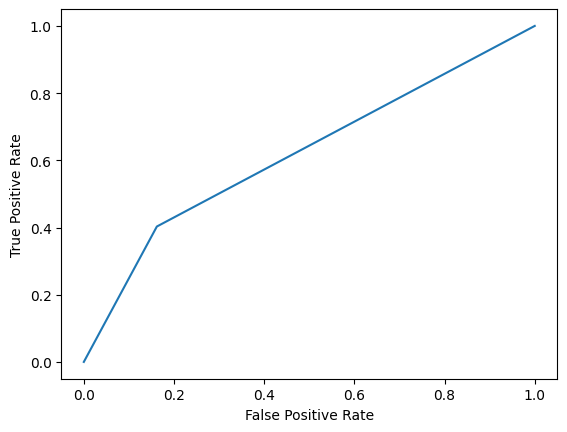

In [144]:
from sklearn import datasets, metrics, model_selection, svm
y_pred_proba = dt_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Observation**

*  Decision Tree provides Accuarcy of 71% 
*  Where -Right pred(True positives and false negatives)were 57.8 and 13.4% 
*  Wrong pred(True negative and false positive) were 18.6 and 10.05%




.

###**Comparing all the models to check whose Accuracy,recall,precision and F1_score is best**

In [87]:
LOG='LOG',round(accuracy_score(y_test,y_pred),2),round(recall_score(y_test,y_pred,average='weighted'),2),round(f1_score(y_test,y_pred,average='weighted'),2),round(precision_score(y_test,y_pred,average='weighted'),2)
NAIVE='NAIVE',round(accuracy_score(y_test,y_pred2),2),round(recall_score(y_test,y_pred2,average='weighted'),2),round(f1_score(y_test,y_pred2,average='weighted'),2),round(precision_score(y_test,y_pred2,average='weighted'),2)
DECISION='DECISION',round(accuracy_score(y_test,y_pred3),2),round(recall_score(y_test,y_pred3,average='weighted'),2),round(f1_score(y_test,y_pred3,average='weighted'),2),round(precision_score(y_test,y_pred3,average='weighted'),2)

In [88]:
list1=['Model name','Accuracy score','Recall','Precison','F1_Score'] 

In [93]:
df=pd.Series(list1)

In [89]:
df1=pd.Series(LOG)
df2=pd.Series(NAIVE)
df3=pd.Series(DECISION)

In [109]:
abc = pd.concat([df,df1,df2,df3], axis=1) 
abc.set_index(df,inplace=True)
abc.iloc[:,1:4]

,1,2,3
Model name,LOG,NAIVE,DECISION
Accuracy score,0.75,0.71,0.71
Recall,0.75,0.71,0.71
Precison,0.73,0.68,0.7
F1_Score,0.74,0.69,0.7


**Observation :** From all models Log regression provides the best scores so we will use this model for predicting future values

.

### **Predicting future values to check which customer will be defaulter and which ones are non defaulters**

In [110]:
future_data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32.0,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21.0,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33.0,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23.0,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24.0,7.8,0.866736,1.005264,NaN


**Predicting defalters with Log regression model**


In [114]:
y_pred=logreg.predict(future_data.drop('default',axis=1)) 

In [116]:
future_data['default']=y_pred

In [118]:
future_data.sample(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
828,46,1,6,19,30.0,17.6,1.415040,3.864960,0.0
785,31,1,6,1,45.0,7.3,0.584730,2.700270,0.0
725,33,4,4,12,22.0,5.5,0.566280,0.643720,0.0
752,32,3,6,12,22.0,6.7,0.384714,1.089286,0.0
736,26,1,0,5,17.0,5.0,0.141950,0.708050,0.0
706,34,1,4,3,28.0,9.4,1.058064,1.573936,0.0
837,31,2,12,8,44.0,9.6,1.867008,2.356992,0.0
757,30,1,0,2,20.0,5.4,0.622080,0.457920,1.0
758,25,3,3,2,54.0,7.4,1.162836,2.833164,0.0
792,45,1,14,26,46.0,5.1,1.262148,1.083852,0.0


In [145]:
future_data.default.value_counts()

0.0    138
1.0     12
Name: default, dtype: int64

###**Final Output and Recommendation** 

*  From log regression model we have predicted the future value of defaulters as 12  and non defaulters as 138 out of 150
*  This can help Bank to disperse the new loans accordingly and will bring profit to there business

*   Bank should focus more on Education level 1 and 2 customers as they have less defaulters
*   Major focus should be on low to middle income class customers as they are the ones  majorly taking loans

**Recommendations**
*   Mojor customers are youngsters who have recently joined job or have some experience so banks should provide some schemes to attract these customers to take there loans  
*  Also we can see these youngsters are majorly less educated so bank can help them persue higher education along with there jobs by providing education loans.












*   List item
*   List item

